In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Exercice 0 : Image Couleur

In [8]:
filename=r"..\TP1\00000050.jpg"
image = cv2.imread(filename)
image

array([[[  3,   1,   0],
        [ 12,  10,   9],
        [  4,   0,   0],
        ...,
        [ 12,  10,   9],
        [  4,   5,   3],
        [  1,   2,   0]],

       [[  2,   0,   0],
        [ 11,   9,   8],
        [ 22,  18,  17],
        ...,
        [  2,   0,   0],
        [  0,   1,   0],
        [  0,   1,   0]],

       [[  2,   0,   0],
        [  2,   0,   0],
        [  4,   0,   0],
        ...,
        [  2,   0,   0],
        [  0,   1,   0],
        [  9,  10,   8]],

       ...,

       [[ 14,  16,  16],
        [138, 140, 140],
        [183, 185, 185],
        ...,
        [255, 255, 255],
        [248, 248, 248],
        [ 94,  94,  94]],

       [[ 14,  16,  16],
        [138, 140, 140],
        [183, 185, 185],
        ...,
        [255, 255, 255],
        [248, 248, 248],
        [ 94,  94,  94]],

       [[ 14,  16,  16],
        [137, 139, 139],
        [182, 184, 184],
        ...,
        [255, 255, 255],
        [248, 248, 248],
        [ 94,  94,  94]]

Text(0.5,1,'canal rouge')

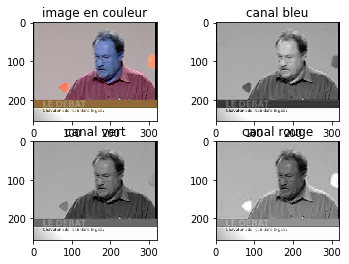

In [12]:
# Observez les 3 canaux de l’image 
#et en couleur ?
filename=r"..\TP1\00000050.jpg"
image = cv2.imread(filename,cv2.IMREAD_UNCHANGED)
rows, col, nbChannels = image.shape
r,g,b = cv2.split(image)

plt.figure()
plt.subplot(2,2,1)
plt.imshow(image)
plt.title('image en couleur')
plt.subplot(2,2,2)
plt.imshow(b, cmap='gray')
plt.title('canal bleu')
plt.subplot(2,2,3)
plt.imshow(g, cmap='gray')
plt.title('canal vert')
plt.subplot(2,2,4)
plt.imshow(r, cmap='gray')
plt.title('canal rouge')


## Exercice 1: Espace de couleur

##### ouvrir une image en couleur

In [14]:
filename=r"..\TP1\00000049.jpg"
image = cv2.imread(filename,cv2.IMREAD_UNCHANGED)


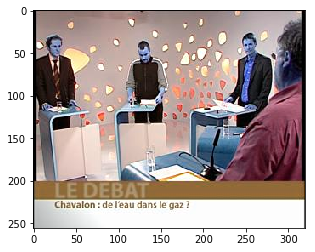

In [15]:
plt.imshow(image)

##### récupérer sa taille avec la propriété shape() : vous observez une 3ème valeur, qui indexe les canaux B, G et R.  

In [18]:
rows, col, nbChannels = image.shape

##### calculer un histogramme (en exploitant la fonction de OpenCV) et visualiser  cv2.calcHist 

(array([105.,  32.,  22.,  15.,   2.,   0.,   0.,   0.,   2.,   2.]),
 array([ 111. ,  206.8,  302.6,  398.4,  494.2,  590. ,  685.8,  781.6,
         877.4,  973.2, 1069. ], dtype=float32),
 <a list of 10 Patch objects>)

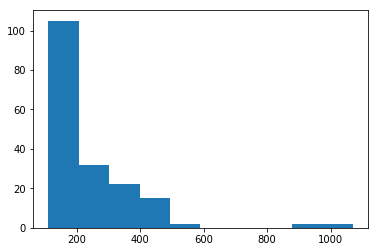

In [30]:
bgrHist=cv2.calcHist([image],[0],None,[180],[0,180])
plt.hist(bgrHist)

##### Bien souvent nous faisons appel à l’espace dit HSV : convertissez l’image en HSV.   cv2.cvtColor 

In [21]:
imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

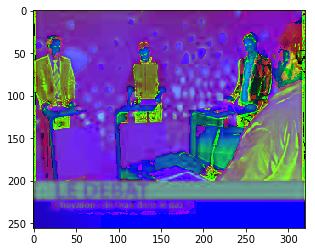

In [23]:
plt.imshow(imageHSV)

##### calculer un nouvel histogramme et visualiser 

(array([148.,  13.,  10.,   3.,   2.,   1.,   1.,   0.,   1.,   1.]),
 array([   0. ,  676.8, 1353.6, 2030.4, 2707.2, 3384. , 4060.8, 4737.6,
        5414.4, 6091.2, 6768. ], dtype=float32),
 <a list of 10 Patch objects>)

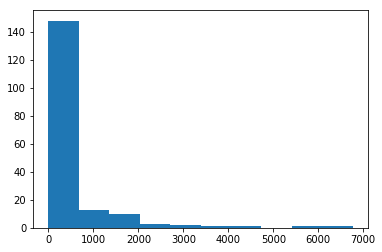

In [28]:
hsvHist=cv2.calcHist([imageHSV],[0],None,[180],[0,180])
plt.hist(hsvHist)

##### Commenter en exploitant deux images : leurs histogrammes BGR et HSV vous apparaissent-ils comme similaires ? différents ? Comment pourrions-nous les comparer de façon automatique ? 

## Exercice 2 : système de recherche par image similaire 

##### Recopier le script proposé : que fait ce script ?

In [47]:
imageName=r"..\TP1\00000050.jpg"
im=cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
# im=cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
np.mean(im)

146.22886962890624

In [49]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

def compareFeatures( sign1, sign2 ):
    #vérification des dimensions
    L1 = len(sign1)
    L2 = len(sign2)
    flag = 1;
    if (L1 == L2 ):
        #calcul de la distance ou de la similarité
        if flag==1:
            d = 0;
            for i in range(L1):
                d=d+ (sign1[i]-sign2[i])**2
            d = np.sqrt( d )
        elif flag==2:
            d = 0;
            for i in range(L1):
                d=d+np.abs(sign1[i]-sign2[i])
        else:
            d = 0;
            for i in range(L1):
                d=d+sign1[i]/sign2[i]*np.log(sign1[i]/sign2[i])
        return d
    else:
        return np.inf


def computeFea( imageName ):
    flag = 1;
    if flag==1:
        im=cv2.imread(imageName, cv2.IMREAD_GRAYSCALE) #en gris
        mi = np.mean(im)
        vi = np.var(im)
        sign = [mi, vi]
    elif flag==2:
        im=cv2.imread(imageName)
        hsv=cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
        h,s,v=cv2.split(hsv)
        mi = np.mean(h)
        vi = np.var(h)
        sign = [mi]
    elif flag==3:
        #SIFT
        im=cv2.imread(imageName, cv2.IMREAD_GRAYSCALE) #en gris
        #à implémenter !
        #
    else:
        im=cv2.imread(imageName)
        hsv=cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
        sign = cv2.calcHist([hsv],[0],None,[180],[0,180])
    return sign
    
#A adapter à votre Path !
#myImagePath = '/Users/Marine/Documents/Telecom/CESDataScientist/images/'
# myImahePath = 'C:\Users\roux\Desktop\CES-DS\orig\'
bComputeFeatures = 1;

myImagePath=r"..\TP1"
#il faudrait implémenter les autres cas ;
#si on doit stocker les #attributs : ce n’est pas fait !

#la liste des images se trouve dans le répertoire indiqué par #myImagePath
listName = myImagePath + '\\list.txt'

allFea = [[]]
allNames = [[]]
if bComputeFeatures:
    #Compute the signatures
    f = open(listName, 'rt')
    n = 0
    for line in f:
        w = line.split()[0]
        filename = myImagePath +"\\"+ w
        print("filename is",filename)
        fea = computeFea( filename )
        #save the result
        allFea.append(fea)
        allNames.append(w)
        n = n+1
    nbImages = n;
    #normalization
    #what could you imagine?
    #Is it necessary?
    
    f.close();
    #save features
else:
    #load features
    nbImages = len(allNames)
    


filename is ..\TP1\00000001.jpg
filename is ..\TP1\00000002.jpg
filename is ..\TP1\00000003.jpg
filename is ..\TP1\00000004.jpg
filename is ..\TP1\00000005.jpg
filename is ..\TP1\00000006.jpg
filename is ..\TP1\00000007.jpg
filename is ..\TP1\00000008.jpg
filename is ..\TP1\00000009.jpg
filename is ..\TP1\00000010.jpg
filename is ..\TP1\00000011.jpg
filename is ..\TP1\00000012.jpg
filename is ..\TP1\00000013.jpg
filename is ..\TP1\00000014.jpg
filename is ..\TP1\00000015.jpg
filename is ..\TP1\00000016.jpg
filename is ..\TP1\00000017.jpg
filename is ..\TP1\00000018.jpg
filename is ..\TP1\00000019.jpg
filename is ..\TP1\00000020.jpg
filename is ..\TP1\00000021.jpg
filename is ..\TP1\00000022.jpg
filename is ..\TP1\00000023.jpg
filename is ..\TP1\00000024.jpg
filename is ..\TP1\00000025.jpg
filename is ..\TP1\00000026.jpg
filename is ..\TP1\00000027.jpg
filename is ..\TP1\00000028.jpg
filename is ..\TP1\00000029.jpg
filename is ..\TP1\00000030.jpg
filename is ..\TP1\00000031.jpg
filename

In [51]:
imgReq

'..\\TP1\\00000050.jpeg'

C:\Users\Hanane\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


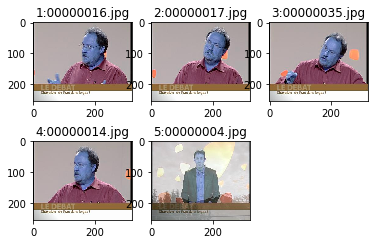

In [58]:
#Compare the request image to all stored images
#N’hésitez pas à changer d’image requête

imgReq = myImagePath + '\\00000050.jpg'
feaReq = computeFea( imgReq );

f = open(listName, 'rt')
allDist = []
for n in range(nbImages):
    d = compareFeatures(allFea[n],feaReq)
    allDist.append(d)
    
#sort the distances
ind = np.argsort(allDist)
#Get the nbFisrt results
nbFirst = 5
plt.figure();
plt.subplot(2,3,1) #pareil que plt.subplot(2,3,6)
plt.imshow(cv2.imread(imgReq))
plt.title('Requete')

for i in range(1,nbFirst+1):
    #on commence à 1 pour éviter l'image requête qui est dans la base
    #cela doit être adapté si ce n’est pas le cas.
    n = ind[i]
    plt.subplot(2,3,i)
    filename = myImagePath + "\\"+allNames[n]
    plt.imshow(cv2.imread(filename))
    plt.title('{}:{}'.format(i,allNames[n]))

plt.show()

##### Exploiter différents jeux d’attributs, modifiez les images requêtes : qu’observez-vous ?

##### Exploitez maintenant, pour un même jeu d’attributs, différentes façons de calculer les distances (L2, L1, Mahalanobis par exemple). Qu’observez-vous ?

##### Qu’avez-vous appris ?